# LCA OWM in Montreal

# 1. Setup project

In [1]:
import brightway2 as bw
import os
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# If file is corrupted do this... happens if kernel wasn't shut down properly before closing 
import os

file_path = r'C:\Users\smacdo55\AppData\Local\pylca\Brightway3\default.c21f969b5f03d33d43e04f8f136e7682\setups.pickle'

if os.path.exists(file_path):
    os.remove(file_path)
    print(f"File {file_path} has been deleted.")
else:
    print(f"File {file_path} not found.")

In [9]:
bw.projects.set_current('OWM LCA')
bw.databases

Databases dictionary with 4 object(s):
	OWM LCA
	biosphere3
	ecoinvent-3.9.1-biosphere
	ecoinvent-3.9.1-cutoff

In [3]:
bio = bw.Database('ecoinvent-3.8-biosphere')
ei = bw.Database('ecoinvent-3.8-cutoff')
m = bw.methods

# 2. Database import 

Import biosphere

In [4]:
import bw2io as bi
bw.bw2setup()
bw.databases

Creating default biosphere

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: ensure_categories_are_tuples
Applied 3 strategies in 0.00 seconds
Title: Writing activities to SQLite3 database:
  Started: 05/28/2025 10:32:01
  Finished: 05/28/2025 10:32:01
  Total time elapsed: 00:00:00
  CPU %: 99.50
  Memory %: 1.45
Created database: biosphere3
Creating default LCIA methods

Wrote 762 LCIA methods with 227223 characterization factors
Creating core data migrations



Databases dictionary with 1 object(s):
	biosphere3

Import ecoinvent

In [4]:
fp = r'C:\Users\smacdo55\Ecoinvent 3.10\Ecospold 0425\categories.xml'
ei310imp = bw.SingleOutputEcospold2Importer(fp,'ecoinvent-3.10.1-cutoff') 
ei310imp.apply_strategies()
ei310imp.statistics()

ValueError: `dirpath` value was not a directory: C:\Users\smacdo55\Ecoinvent 3.10\Ecospold 0425\categories.xml

In [4]:
# one way
if 'Ecoinvent 3.10 Cutoff EcoSpold01' in bw.databases:
    print("Database has already been imported.")
else:
    # mind that the ecoinvent file must be unzipped; then: path to the datasets subfolder
    fpei35cut = r"C:\Users\smacdo55\Ecoinvent 3.10\EcoSpold01"
    # the "r" makes sure that the path is read as a string - especially useful when you have spaces in your string
    ei35cut = bw.SingleOutputEcospold2Importer(fpei35cut, 'ecoinvent 3.5_cutoff_ecoSpold02')
    ei35cut
    ei35cut.apply_strategies()
    ei35cut.statistics()

Extracting ecospold2 files:


Title: Extracting ecospold2 files:
  Started: 04/23/2025 15:04:07
  Finished: 04/23/2025 15:04:07
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.54
Extracted 0 datasets in 0.02 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_uncertaint

C:\Users\smacdo55\AppData\Local\miniconda3\envs\bw\Lib\site-packages\bw2io\strategies\ecospold2.py:1070: UserWarning: Skipping migration 'fix-ecoinvent-flows-pre-35' because it isn't installed
  warnings.warn(


In [13]:
# another way
bw.import_ecoinvent_release('3.8', 'cutoff','ebenezer.kwofie@mcgill.ca', '2EBz*!#0DCH4')

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: ensure_categories_are_tuples
Applied 3 strategies in 0.00 seconds
4421 datasets
0 exchanges
0 unlinked exchanges
  
Title: Writing activities to SQLite3 database:
  Started: 05/28/2025 10:44:08
  Finished: 05/28/2025 10:44:08
  Total time elapsed: 00:00:00
  CPU %: 99.80
  Memory %: 1.78
Created database: ecoinvent-3.8-biosphere
Extracting XML data from 19565 datasets
Extracted 19565 datasets in 24.49 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_eco

Import own data

In [14]:
imp = bw.ExcelImporter(r"Canada OWM Facilities Database.xlsx") # the path to your inventory excel file
imp.apply_strategies()
imp.match_database("ecoinvent-3.8-cutoff", fields=('name', 'unit', 'location', 'reference product')) # 'reference product'
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
imp.write_excel(only_unlinked=True)
list(imp.unlinked)
imp.write_database()

Extracted 3 worksheets in 0.03 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 1.88 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
16 datasets
140 exchanges
0 unlinked exchanges
  
Wrote matching file to:
/Users/yonata

In [15]:
imp = bw.ExcelImporter(r"Scenarios Database.xlsx") # the path to your inventory excel file
imp.apply_strategies()
imp.match_database("OWM LCA", fields=('name', 'unit', 'location', 'reference product')) # 'reference product'
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()
imp.write_excel(only_unlinked=True)
list(imp.unlinked)
imp.write_database()

Extracted 1 worksheets in 0.02 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 2.02 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
3 datasets
26 exchanges
0 unlinked exchanges
  
Wrote matching file to:
/Users/yonatanb

In [16]:
#check if it imported properly
list(bw.databases)

['biosphere3',
 'ecoinvent-3.9.1-biosphere',
 'ecoinvent-3.9.1-cutoff',
 'OWM LCA',
 'Scenarios',
 'ecoinvent-3.8-biosphere',
 'ecoinvent-3.8-cutoff']

Set up scenarios

In [17]:
LCAdb =  bw.Database('Scenarios')
S1 = [a for a in LCAdb if 'S1' in a ['name']]
S2 = [a for a in LCAdb if 'S2' in a ['name']]
S3 = [a for a in LCAdb if 'S3' in a ['name']]
acts = S1[0], S2[0], S3[0]
acts

('S1' (tonne, CA-QC, None),
 'S2' (tonne, CA-QC, None),
 'S3' (tonne, CA-QC, None))

In [18]:
LCAdb =  bw.Database('OWM LCA')
Landfill = [a for a in LCAdb if 'Landfill_terrebonne' in a ['name']]
Closed_composter = [a for a in LCAdb if 'Closed-tunnel Composter' in a ['name']]
AD = [a for a in LCAdb if 'AD' in a ['name']]
acts = Landfill[0], S2[0], S3[0]
acts

('Landfill_terrebonne' (tonne, CA-QC, None),
 'S2' (tonne, CA-QC, None),
 'S3' (tonne, CA-QC, None))

Choose an impact assessment method

In [19]:
CC_method = [m for m in bw.methods if 'IPCC 2013' in str(m) and not 'LT' in str(m) and 'GWP 100' in str(m)]
CC_method

[('IPCC 2013', 'climate change', 'GWP 100a')]

# 3. Calculate LCA

In [20]:
FU = [{x:1} for x in acts] #functional unit
bw.calculation_setups['OWM_Scenarios'] = {'inv':FU, 'ia': CC_method}
mylca = bw.MultiLCA('OWM_Scenarios')
mylca.results

array([[489.64205929],
       [558.47728076],
       [365.23302694]])

In [21]:
{k:v for k,v in zip(CC_method, mylca.results)}

{('IPCC 2013', 'climate change', 'GWP 100a'): array([489.64205929])}

display results

In [22]:
import pandas as pd
mylcadf = pd.DataFrame(index = CC_method, columns = [(x['name']) for y in FU for x in y], data=mylca.results.T)
mylcadf

,Landfill_terrebonne,S2,S3
"(IPCC 2013, climate change, GWP 100a)",489.642059,558.477281,365.233027


optional

In [23]:
mylcadf.to_excel('lcia_results.xlsx') # export to excel, e.g. for creating figures

In [24]:
acts

('Landfill_terrebonne' (tonne, CA-QC, None),
 'S2' (tonne, CA-QC, None),
 'S3' (tonne, CA-QC, None))

In [25]:
CC_method

[('IPCC 2013', 'climate change', 'GWP 100a')]

In [26]:
#short names
labels_methods = {
    ('IPCC 2013', 'climate change', 'GWP 100a'): 'IPCC 2013',    
}
labels_act = {
    ('S1', 'CA-QC'):'S1',
    ('S2', 'CA-QC'):'S2',
    ('S3', 'CA-QC'):'S2',
}

In [27]:
#see updates labels
mylcadf

,Landfill_terrebonne,S2,S3
"(IPCC 2013, climate change, GWP 100a)",489.642059,558.477281,365.233027


In [28]:
df = mylcadf.rename(columns=labels_act, index=labels_methods)
df

,Landfill_terrebonne,S2,S3
IPCC 2013,489.642059,558.477281,365.233027


<Axes: xlabel='Impact category', ylabel='Impact score (kg CO2-eq)'>

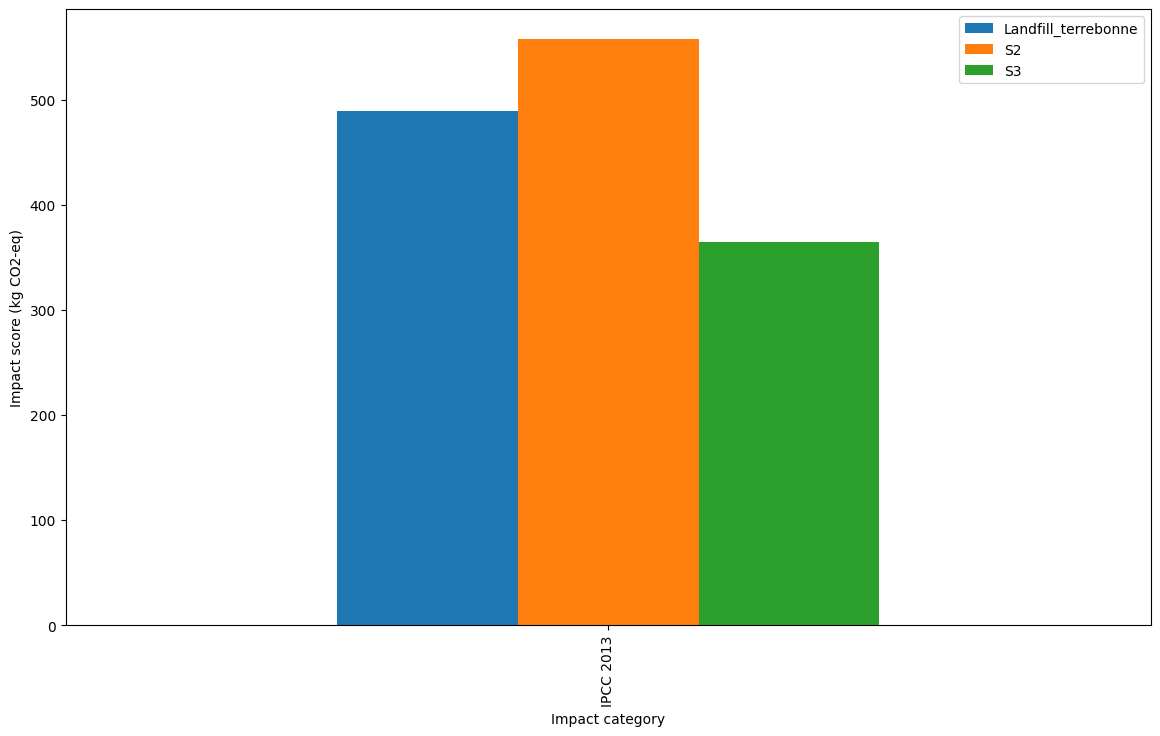

In [29]:
df.plot.bar(
    xlabel='Impact category',
    ylabel='Impact score (kg CO2-eq)',
    figsize=(14,8)
)

# Contribution analysis

### We can calculate the most important activities and biosphere flows.

In [30]:
from bw2analyzer import ContributionAnalysis

Most important activities

In [31]:
lca.demand
lca.method
print("The {} process accounts for {:f} {}.".format(
    list(functional_unit.keys())[0]['name'],
    lca.score,
    bw.methods.get(method_key).get('unit')
    ))

NameError: name 'lca' is not defined

In [32]:
ContributionAnalysis().annotated_top_processes(lca)

NameError: name 'lca' is not defined

Most important biosphere flows

In [ ]:
ContributionAnalysis().annotated_top_emissions(lca)

# Monte Carlo LCA

Unfortunately, the forwast database doesn't unclude uncertainty. Let's put some in anyways, using the utility function uncertainify.

In [33]:
from bw2data.utils import uncertainify
from stats_arrays import NormalUncertainty
uncertain_db = Database("forwast uncertain +")
uncertain_db.write(
    uncertain_db.relabel_data(
        uncertainify(
            Database("forwast").load(), 
            NormalUncertainty
        ), 
        "forwast uncertain +" 
    )
)

NameError: name 'Database' is not defined

We can now calculate some Monte Carlo iterations for a random activity.

In [ ]:
mc = MonteCarloLCA(demand={uncertain_db.random(): 1}, method=method_key)
mc.load_data()
for x in range(10):
    print(next(mc))

That't it! Here is your promised kitten:

In [ ]:
from IPython.display import Image
import random
dimensions = sorted((int(random.random() * 600 + 200), int(random.random() * 600 + 200)))
Image(url="http://placekitten.com/{}/{}/".format(*dimensions))